In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

feature_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df=pd.DataFrame(data,columns=feature_names)
df['PRICE']=target

print("\nFeature names :",df.columns.tolist())
print("Shape :",df.shape)
print("\nSize :",df.size)
print("\nFirst Five rows :\n",df.head())


Feature names : ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
Shape : (506, 14)

Size : 7084

First Five rows :
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


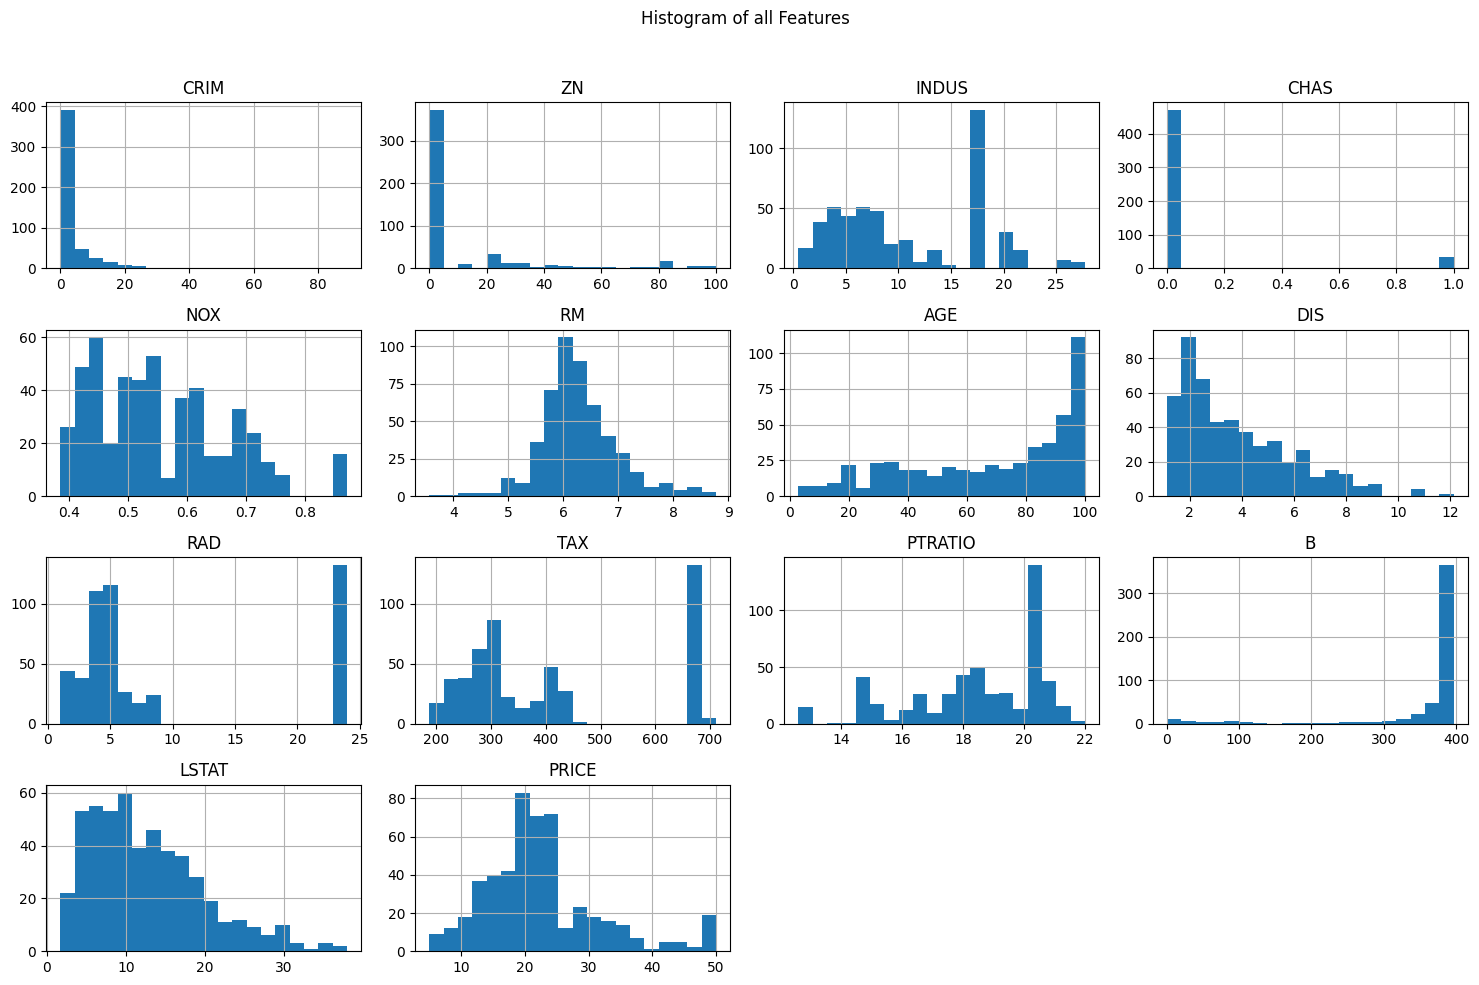

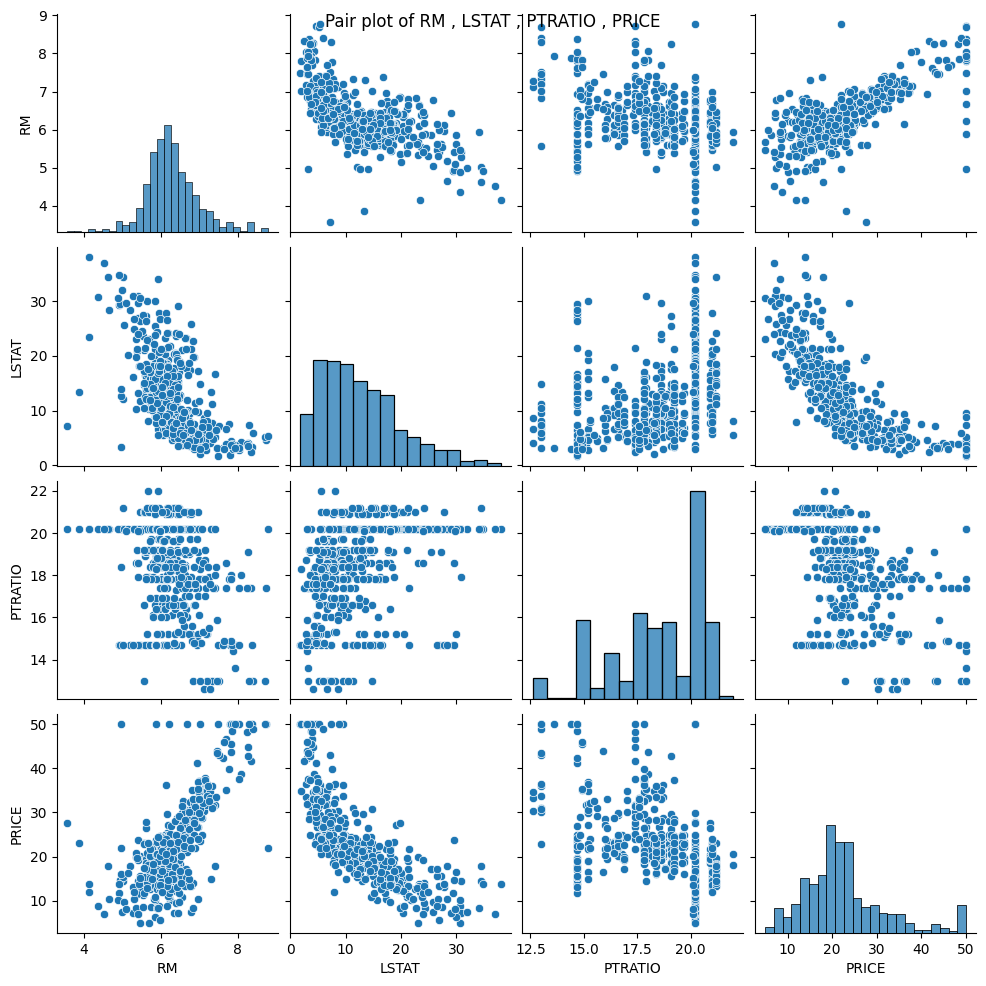





             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175

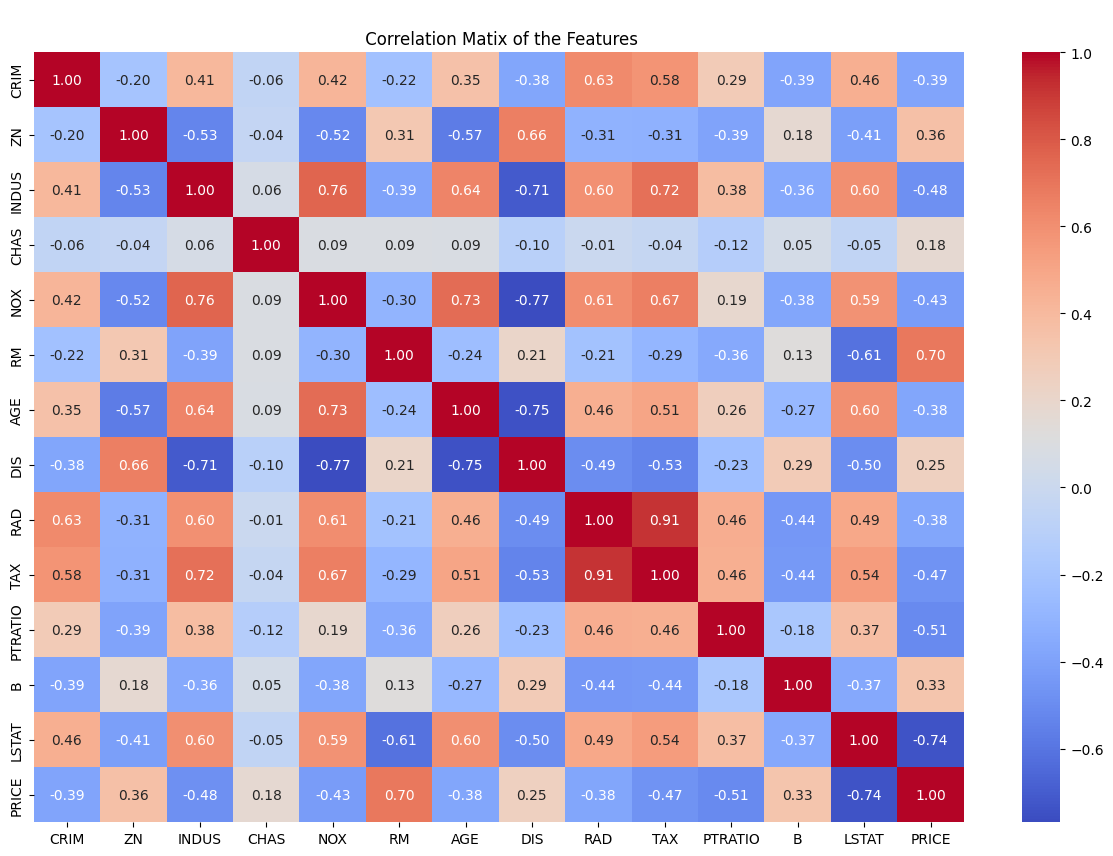

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=20,figsize=(15,10))
plt.suptitle("Histogram of all Features\n\n")
plt.tight_layout()
plt.show()

print("\n\n\n")
sns.pairplot(df[['RM','LSTAT','PTRATIO','PRICE']])
plt.suptitle("Pair plot of RM , LSTAT , PTRATIO , PRICE\n\n")
plt.show()

print("\n\n\n")
print(df.corr())

print("\n\n\n")
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("\n Correlation Matix of the Features")
plt.show()

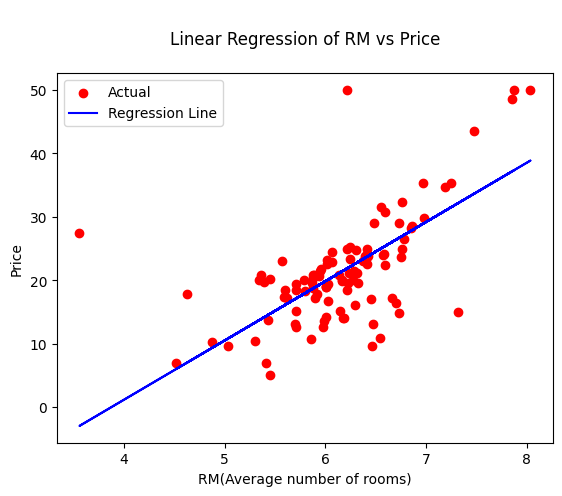



Intercept : -36.25
coefficient : 9.35


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df[['RM']]
Y=df['PRICE']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

plt.scatter(X_test,Y_test,color='Red',label='Actual')
plt.plot(X_test,y_pred,color='Blue',label='Regression Line')
plt.xlabel("RM(Average number of rooms)")
plt.ylabel("Price")
plt.title("\nLinear Regression of RM vs Price\n")
plt.legend()
plt.show()

print("\n")
print(f"Intercept : {model.intercept_:.2f}")
print(f"coefficient : {model.coef_[0]:.2f}")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df.drop('PRICE', axis=1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred = multi_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 3.19
MSE: 24.29
RMSE: 4.93
R²: 0.67


Feature Coefficients:
     Feature  Coefficient
5        RM     4.438835
3      CHAS     2.784438
8       RAD     0.262430
2     INDUS     0.040381
1        ZN     0.030110
11        B     0.012351
6       AGE    -0.006296
9       TAX    -0.010647
0      CRIM    -0.113056
12    LSTAT    -0.508571
10  PTRATIO    -0.915456
7       DIS    -1.447865
4       NOX   -17.202633


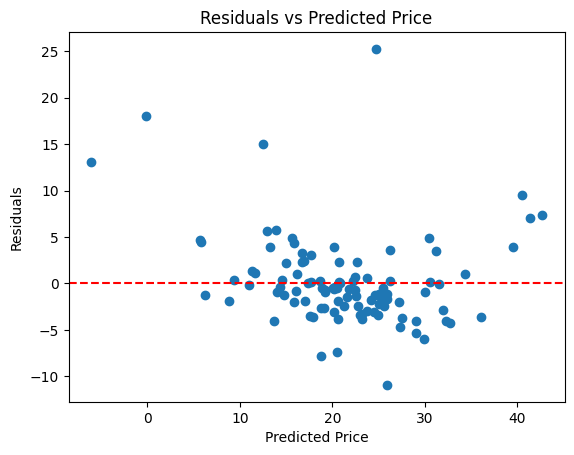

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': multi_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Coefficients:\n", coefficients)

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()


In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Create dataset
data = {
    "marks": [30, 45, 55, 65, 70, 40, 85, 25, 90, 50],
    "result": ["Fail", "Fail", "Pass", "Pass", "Pass",
               "Fail", "Pass", "Fail", "Pass", "Pass"]
}

df = pd.DataFrame(data)
df["result"] = df["result"].map({"Fail": 0, "Pass": 1})

# Step 2: Train model on all data (small dataset, so no split)
X = df[["marks"]]
y = df["result"]

model = LogisticRegression()
model.fit(X, y)

# Step 3: Predict for new students (fix warning with DataFrame)
new_marks = pd.DataFrame({"marks": [60, 35, 80]})
predictions = model.predict(new_marks)

for mark, pred in zip(new_marks["marks"], predictions):
    print(f"Marks {mark} → {'Pass' if pred == 1 else 'Fail'}")


Marks 60 → Pass
Marks 35 → Fail
Marks 80 → Pass
